Neste projeto, será criado um sistema de recomendação de filmes utilizando os dados do MovieLens.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Get Data

In [2]:
# lendo os dados
filmes = pd.read_csv('movies.csv')
notas = pd.read_csv('ratings.csv')

# alterando os nomes das colunas
filmes.columns = ['filmeId', 'titulo', 'generos']
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

# EDA

In [3]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


As notas vão de 0.5 a 5.

# Primeira abordagem: total de votos

Para a primeira abordagem, pode-se olhar as notas que os usuários atribuíram ao filme.

In [6]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# criando tabela única para melhor análise
df = pd.merge(notas, filmes, how = 'left', right_on = 'filmeId',
left_on = 'filmeId')

In [9]:
df.head()

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [10]:
# encontrando o filme com mais números de votos
df['filmeId'].value_counts().head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [11]:
## filtrando o filme com mais número de votos
df[df['filmeId'] == df['filmeId'].value_counts().index[0]]

,usuarioId,filmeId,nota,momento,titulo,generos
20,1,356,4.0,964980962,Forrest Gump (1994),Comedy|Drama|Romance|War
725,6,356,5.0,845553200,Forrest Gump (1994),Comedy|Drama|Romance|War
880,7,356,5.0,1106635915,Forrest Gump (1994),Comedy|Drama|Romance|War
1053,8,356,3.0,839463527,Forrest Gump (1994),Comedy|Drama|Romance|War
1120,10,356,3.5,1455301685,Forrest Gump (1994),Comedy|Drama|Romance|War
...,...,...,...,...,...,...
97154,605,356,3.0,1277097509,Forrest Gump (1994),Comedy|Drama|Romance|War
97428,606,356,4.0,1171231370,Forrest Gump (1994),Comedy|Drama|Romance|War
98735,608,356,3.0,1117162603,Forrest Gump (1994),Comedy|Drama|Romance|War
99514,609,356,4.0,847220869,Forrest Gump (1994),Comedy|Drama|Romance|War


Sendo o mais votado, poderia-se recomendar para os outros usuários.

In [12]:
# criando coluna com a quantidade de notas atribuídas aos filmes
df_aux = df.groupby(by = 'filmeId').agg({'nota':'count'}).reset_index()
df_aux.head()

,filmeId,nota
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [13]:
# juntando o dataframe inicial com a coluna de quantidade de notas
df = pd.merge(df, df_aux, how = 'left',
right_on = 'filmeId', left_on = 'filmeId')

In [14]:
# renomeando colunas
df.rename(columns = {'nota_x':'nota',
                    'nota_y':'total_de_votos'}, inplace = True)

In [15]:
# obtendo os filmes mais votados pelas pessoas
df.groupby(by = ['titulo']).agg({'total_de_votos':'count'}).reset_index().sort_values(by = 'total_de_votos', ascending = False).head(10)

,titulo,total_de_votos
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278
8001,Star Wars: Episode IV - A New Hope (1977),251
4662,Jurassic Park (1993),238
1337,Braveheart (1995),237
8363,Terminator 2: Judgment Day (1991),224
7421,Schindler's List (1993),220


Para a primeira abordagem, estes seriam os filmes recomendados para os usuários.

In [16]:
# obtendo os filmes mais votados pelas pessoas e suas notas médias
df_aux2 = df.groupby(by = ['titulo', 'filmeId']).agg({'total_de_votos':'count', 'nota':'mean'}).reset_index().sort_values(by = 'total_de_votos', ascending = False)
df_aux2.rename(columns = {'nota':'nota_media'}, inplace = True)
df_aux2

,titulo,filmeId,total_de_votos,nota_media
3161,Forrest Gump (1994),356,329,4.164134
7597,"Shawshank Redemption, The (1994)",318,317,4.429022
6868,Pulp Fiction (1994),296,307,4.197068
7684,"Silence of the Lambs, The (1991)",593,279,4.161290
5515,"Matrix, The (1999)",2571,278,4.192446
...,...,...,...,...
4774,King Ralph (1991),7005,1,1.500000
4772,King Kong Lives (1986),2368,1,2.000000
4767,"Kindred, The (1986)",2740,1,1.000000
4766,Kindergarten Cop 2 (2016),158254,1,1.500000


As notas médias não são necessariamente as melhores para os filmes mais votados.

In [17]:
df_aux3 = df_aux2[['filmeId', 'nota_media']]
df_aux3.head()

,filmeId,nota_media
3161,356,4.164134
7597,318,4.429022
6868,296,4.197068
7684,593,4.161290
5515,2571,4.192446


In [18]:
df = pd.merge(df, df_aux3, how = 'left', right_on = 'filmeId', left_on = 'filmeId')

In [19]:
df.head()

,usuarioId,filmeId,nota,momento,titulo,generos,total_de_votos,nota_media
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,102,3.946078
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203,3.975369
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204,4.237745


# Segunda abordagem - ordenar pela nota média

In [20]:
df.sort_values(by = 'nota_media', ascending = False).head(10)

,usuarioId,filmeId,nota,momento,titulo,generos,total_de_votos,nota_media
66992,432,45503,5.0,1316391388,Peaceful Warrior (2006),Drama,1,5.0
16936,105,179133,5.0,1526207351,Loving Vincent (2017),Animation|Crime|Drama,1,5.0
16885,105,147196,5.0,1526207040,The Girls (1961),Comedy|Romance,1,5.0
64142,414,6442,5.0,1055265907,Belle époque (1992),Comedy|Romance,2,5.0
17249,110,7096,5.0,1175330140,Rivers and Tides (2001),Documentary,1,5.0
28004,191,496,5.0,829760898,What Happened Was... (1994),Comedy|Drama|Romance|Thriller,1,5.0
68366,443,96430,5.0,1501722543,"Odd Life of Timothy Green, The (2012)",Comedy|Drama|Fantasy,1,5.0
78207,484,71268,5.0,1342300642,Tyler Perry's I Can Do Bad All by Myself (2009),Comedy|Drama,1,5.0
16886,105,147250,5.0,1526207354,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),1,5.0
16917,105,172587,5.0,1526207610,Vacations in Prostokvashino (1980),Animation,1,5.0


Estes filmes possuem altas notas médias, porém baixas notas 1. Os filmes não devem ser recomendados somente pelas maiores notas médias, pois estes filmes podem ser filmes de nicho ou votados somente por poucos usuários.

# Terceira abordagem: recomendação por gêneros

Pode-se recomendar ao usuário filmes similares em gênero aos que este assistiu.

Peguemos um número qualquer de usuarioId e vejamos os primeiros 10 filmes assistidos por ele.

In [21]:
df[df['usuarioId'] == 5].head(10)

,usuarioId,filmeId,nota,momento,titulo,generos,total_de_votos,nota_media
516,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
517,5,21,4.0,847435238,Get Shorty (1995),Comedy|Crime|Thriller,89,3.494382
518,5,34,4.0,847434881,Babe (1995),Children|Drama,128,3.652344
519,5,36,4.0,847435292,Dead Man Walking (1995),Crime|Drama,67,3.835821
520,5,39,3.0,847434961,Clueless (1995),Comedy|Romance,104,3.293269
521,5,50,4.0,847434881,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204,4.237745
522,5,58,5.0,847435238,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,37,4.027027
523,5,110,4.0,847434880,Braveheart (1995),Action|Drama|War,237,4.031646
524,5,150,3.0,847434748,Apollo 13 (1995),Adventure|Drama|IMAX,201,3.845771
525,5,153,3.0,847434802,Batman Forever (1995),Action|Adventure|Comedy|Crime,137,2.916058


Baseado nestes filmes que o usuário assistiu, pode-se recomendar filmes baseados nos últimos filmes assistidos por ele na plataforma.

In [22]:
df

,usuarioId,filmeId,nota,momento,titulo,generos,total_de_votos,nota_media
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,102,3.946078
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203,3.975369
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204,4.237745
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,6,3.333333
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,7,4.142857
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,15,3.633333
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,25,4.280000


In [23]:
df[df['generos'] == 'Action|Adventure|Comedy|Crime'].sort_values(by = 'nota_media', ascending = False)

,usuarioId,filmeId,nota,momento,titulo,generos,total_de_votos,nota_media
100732,610,119145,4.5,1493846044,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,36,3.986111
7902,52,119145,4.0,1468051301,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,36,3.986111
39168,272,119145,4.0,1532266319,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,36,3.986111
41224,279,119145,4.0,1506394589,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,36,3.986111
43926,292,119145,4.0,1483193792,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,36,3.986111
...,...,...,...,...,...,...,...,...
40007,274,5803,1.5,1197189341,I Spy (2002),Action|Adventure|Comedy|Crime,7,2.500000
40964,275,5803,2.0,1049077559,I Spy (2002),Action|Adventure|Comedy|Crime,7,2.500000
69485,448,5803,2.0,1087149734,I Spy (2002),Action|Adventure|Comedy|Crime,7,2.500000
67997,438,5803,3.0,1105654270,I Spy (2002),Action|Adventure|Comedy|Crime,7,2.500000


In [24]:
df[df['generos'] == 'Action|Adventure|Comedy|Crime'].sort_values(by = 'nota_media', ascending = False)['titulo'].unique()

array(['Kingsman: The Secret Service (2015)',
       'Rumble in the Bronx (Hont faan kui) (1995)',
       'Nothing to Lose (1997)', "It's a Mad, Mad, Mad, Mad World (1963)",
       'Batman Forever (1995)', 'Crime Busters (1977)', 'I Spy (2002)'],
      dtype=object)

Estes são os filmes com maiores notas médias dentro do gênero do último filme assistido pelo usuário.

In [25]:
df[['titulo', 'generos', 'total_de_votos','nota_media']].set_index(['generos','titulo']).sort_values(by='nota_media', ascending = False)

total_de_votos  \
generos                              titulo                                                               
Drama                                Peaceful Warrior (2006)                                          1   
Animation|Crime|Drama                Loving Vincent (2017)                                            1   
Comedy|Romance                       The Girls (1961)                                                 1   
                                     Belle époque (1992)                                              2   
Documentary                          Rivers and Tides (2001)                                          1   
...                                                                                                 ...   
Horror|Thriller                      Films to Keep You Awake: The Christmas Tale (Pe...               1   
Children|Comedy                      Tooth Fairy 2 (2012)                                             1   
Drama                                Cincinnati Kid, The (1965)                                       1   
(no genres listed)                   Ben-hur (2016)                                                   1   
Adventure|Animation|Children|Fantasy Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2...               2   

                                                                                         nota_media  
generos                              titulo                                                          
Drama                                Peaceful Warrior (2006)                                    5.0  
Animation|Crime|Drama                Loving Vincent (2017)                                      5.0  
Comedy|Romance                       The Girls (1961)                                           5.0  
                                     Belle époque (1992)                                        5.0  
Documentary                          Rivers and Tides (2001)                                    5.0  
...                                                                                             ...  
Horror|Thriller                      Films to Keep You Awake: The Christmas Tale (Pe...         0.5  
Children|Comedy                      Tooth Fairy 2 (2012)                                       0.5  
Drama                                Cincinnati Kid, The (1965)                                 0.5  
(no genres listed)                   Ben-hur (2016)                                             0.5  
Adventure|Animation|Children|Fantasy Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2...         0.5  

[100836 rows x 2 columns]

# Usuários similares

Suponhamos que dois usuários deram notas para filmes distintos, sendo elas 4, 4.5 para o primeiro usuário e 5 e 5 para o segundo usuário.

Para definir a similaridade entre usuários, pode-se utilizar essas distâncias, que serão definidas a seguir,

In [26]:
# notas do usuário 1
usuario1 = np.array([4, 4.5])

# notas do usuário 2
usuario2 = np.array([5, 5])

# notas do usuário 3
usuario3 = np.array([3.5, 4.5])

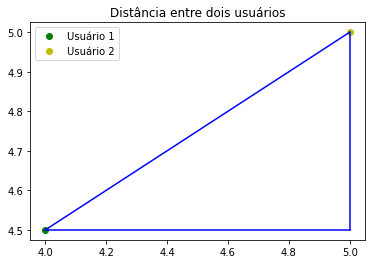

In [27]:
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(['Usuário 1', 'Usuário 2'])
plt.title('Distância entre dois usuários')

plt.plot([4, 5], [4.5, 4.5], color = 'b', linestyle = "-")
plt.plot([4, 5], [4.5, 5], color = 'b', linestyle = "-")
plt.plot([5, 5], [5, 4.5], color = 'b', linestyle = "-")

In [28]:
# distância entre os usuários 1 e 2
np.linalg.norm(usuario1 - usuario2)

1.118033988749895

Text(0.5, 1.0, 'Distância entre usuários')

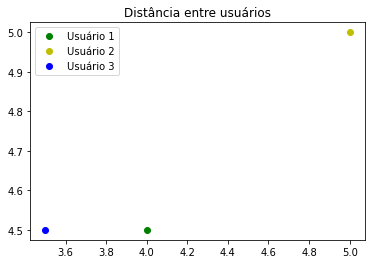

In [29]:
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['Usuário 1', 'Usuário 2', 'Usuário 3'])
plt.title('Distância entre usuários')

Quem é mais próximo do usuário 1?

In [30]:
# distância entre os usuários 1 e 2
d1 = np.linalg.norm(usuario1 - usuario2)
print('A distância do usuário 1 ao usuário 2 é:', d1.round(2))

# distância entre os usuários 1 e 3
d2 = np.linalg.norm(usuario1 - usuario3)
print('A distância do usuário 1 ao usuário 3 é:', d2)

A distância do usuário 1 ao usuário 2 é: 1.12
A distância do usuário 1 ao usuário 3 é: 0.5


Portanto, deve-se olhar para o usuário 3 que possui uma distância menor (portanto maior similaridade) ao ser recomendado um filme para o usuário 1.

A partir disso, pode-se definir então uma função de distância para descobrir quais são os usuários que mais devem ser analisados ao se recomendar filmes para um usuário específico. 

O cálculo da distância será feito no espaço Rn, então não há limites da quantidade de filmes assistidos (e portanto notas atribuídas) de um usuário.

# Distância entre dois usuários

In [31]:
def distancia_de_vetores(a, b):
    return np.linalg.norm(a - b)

In [32]:
distancia_de_vetores(usuario1, usuario2)

1.118033988749895

In [33]:
distancia_de_vetores(usuario1, usuario3)

0.5

In [34]:
def notas_do_usuario(usuario):

    # fltra o dataframe pelo usuarioId
    notas_do_usuario = df[df['usuarioId'] == usuario]
    
    # setta o index como a coluna de filmeId
    notas_do_usuario = notas_do_usuario[['filmeId', 'nota']].set_index(['filmeId'])
    return notas_do_usuario

def distancia_de_usuarios(usuario_id1, usuario_id2):

    # trás notas dos usuários 1 e 2
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)

    # trazer somente os filmes que os dois usuários assistiram
    diferencas = notas1.join(notas2, lsuffix = '_esquerda', rsuffix = '_direita').dropna()

    # calcula a distância entre os dois usuários
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return distancia

In [35]:
usuario1 = notas_do_usuario(usuario = 1)
usuario2 = notas_do_usuario(usuario = 2)

In [36]:
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [37]:
usuario2.head()

,nota
filmeId,
318,3.0
333,4.0
1704,4.5
3578,4.0
6874,4.0


Para fazer somente a diferença filme a filme, será feito um join entre ambos os usuários.

In [38]:
# trazer somente os filmes que os dois usuários assistiram
diferencas = usuario1.join(usuario2, lsuffix = '_esquerda', rsuffix = '_direita').dropna()

# calcula a distância entre os dois usuários
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

1.4142135623730951

In [39]:
def distancia_de_usuarios(usuario_id1, usuario_id2):

    # trás notas dos usuários 1 e 2
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)

    # trazer somente os filmes que os dois usuários assistiram
    diferencas = notas1.join(notas2, lsuffix = '_esquerda', rsuffix = '_direita').dropna()

    # calcula a distância entre os dois usuários
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [40]:
distancia_de_usuarios(1, 2)

[1, 2, 1.4142135623730951]

# Distância entre todos os usuários

In [41]:
quantidade_de_usuarios = len(df['usuarioId'].unique())
print('Temos', quantidade_de_usuarios, ' usuários no dataset.')

Temos 610  usuários no dataset.


In [42]:
def distancia_de_todos(voce_id):
    todos_os_usuarios = notas['usuarioId'].unique()
    distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

In [43]:
distancia_de_todos(1).sort_values(by = 'distancia').head(10)

,voce,outra_pessoa,distancia
0,1,1,0.0
577,1,578,0.0
76,1,77,0.0
84,1,85,0.0
174,1,175,0.0
555,1,556,0.0
252,1,253,0.0
290,1,291,0.0
305,1,306,0.0
495,1,496,0.0


Os outros usuários deram a mesma nota que os usuários 1 (você)?

In [44]:
notas_do_usuario(1)

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [45]:
notas_do_usuario(1).join(notas_do_usuario(175), lsuffix = '_1', rsuffix = '_175').dropna()

,nota_1,nota_175
filmeId,,


Vazio pois o usuário 175 não assistiu nada que o usuário 1 assistiu.

# Colocar usuários em comum distantes uns dos outros

In [46]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):

    # trás notas dos usuários 1 e 2
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)

    # trazer somente os filmes que os dois usuários assistiram
    diferencas = notas1.join(notas2, lsuffix = '_esquerda', rsuffix = '_direita').dropna()

    if(len(diferencas) < minimo):
        return [usuario_id1, usuario_id2, 1000000]

    # calcula a distância entre os dois usuários
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [47]:
distancia_de_todos(1).sort_values(by = 'distancia', ascending = False).head(10)

,voce,outra_pessoa,distancia
305,1,306,1000000.0
505,1,506,1000000.0
271,1,272,1000000.0
258,1,259,1000000.0
86,1,87,1000000.0
84,1,85,1000000.0
256,1,257,1000000.0
252,1,253,1000000.0
439,1,440,1000000.0
441,1,442,1000000.0


Estes usuarios com distância 1000000 não possuem nenhum filme em comum.

In [48]:
def mais_proximos_de(voce_id):
    distancias = distancia_de_todos(voce_id)
    mp = distancias.sort_values(by = 'distancia')
    mp = distancias.set_index('outra_pessoa').drop(voce_id)
    return mp

In [49]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
2,1,1000000.000000
3,1,8.200610
4,1,11.135529
5,1,3.741657
6,1,8.602325


# Parâmetros para teste do sistema

In [50]:
def mais_proximos_de(voce_id, n = None):
    distancias = distancia_de_todos(voce_id, n = n)
    mp = distancias.sort_values(by = 'distancia')
    mp = distancias.set_index('outra_pessoa').drop(voce_id)
    return mp

In [51]:
def distancia_de_todos(voce_id, n = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

In [52]:
mais_proximos_de(1, n = 50)

,voce,distancia
outra_pessoa,,
2,1,1000000.000000
3,1,8.200610
4,1,11.135529
5,1,3.741657
6,1,8.602325
7,1,7.106335
8,1,3.741657
9,1,1.000000
10,1,7.858117


Os usuários indesejados ainda aparecem nos dados.

In [53]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):

    # trás notas dos usuários 1 e 2
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)

    # trazer somente os filmes que os dois usuários assistiram
    diferencas = notas1.join(notas2, lsuffix = '_esquerda', rsuffix = '_direita').dropna()

    if(len(diferencas) < minimo):
        return None


    # calcula a distância entre os dois usuários
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [54]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    mp = distancias.sort_values(by = 'distancia')
    mp = distancias.set_index('outra_pessoa').drop(voce_id)
    return mp

In [55]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
    distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

In [56]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,voce,distancia
outra_pessoa,,
3,1,8.200610
4,1,11.135529
5,1,3.741657
6,1,8.602325
7,1,7.106335
8,1,3.741657
9,1,1.000000
10,1,7.858117
11,1,4.242641


Agora os usuários que não possuem nada em comum (distancia = 1000000), não são mais trazidos.

In [57]:
filmes = filmes.set_index(['filmeId'])

In [58]:
def sugere_para(voce):

    # suas notas
    notas_de_voce = notas_do_usuario(voce)

    # indice do filme visto por ti
    filmes_vistos = notas_de_voce.index

    # pessoas similares
    similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = 50)

    # pessoa mais similar
    similar = similares.sort_values(by = 'distancia').iloc[0].name

    # extrai a nota do similar
    notas_do_similar = notas_do_usuario(similar)

    # droppa aquilo que você já viu
    notas_do_similar = notas_do_similar.drop(filmes_vistos, errors = 'ignore')
    
    # ordena de acordo com as notas datas
    recomendacoes = notas_do_similar.sort_values(by = 'nota', ascending = False).head()

    # join com o dataframe filmes para ter o título dos filmes
    recomendacoes = recomendacoes.join(filmes)
    return recomendacoes

In [68]:
sugere_para(10).head(5)

,nota,titulo,generos
filmeId,,,
2072,5.0,"'burbs, The (1989)",Comedy
1357,5.0,Shine (1996),Drama|Romance
222,5.0,Circle of Friends (1995),Drama|Romance
256,5.0,Junior (1994),Comedy|Sci-Fi
2572,5.0,10 Things I Hate About You (1999),Comedy|Romance


# Utilizando o KNN